# Perceptron para compuerta lógica OR


En terminos matemáticos, describimos una neurona $K$ con las siguientes ecuaciones

\begin{equation}
\upsilon_k = \sum_{j=1}^{m} W_{kj} X_j
\end{equation}

y

\begin{equation}
y_k = L \left( \upsilon_k + b_k \right)
\end{equation}

Donde $X_1, X_2,...X_m$ son las señales de entrada $W_{k1}, W_{k2},...W_{km}$ son
los pesos asociados a cada conexión a la neurona,  $b_k$ es el bias, $L()$ es la función 
de activación. El bias $b_k$ tiene un efecto de aplicar una transformación a la salida
de $\upsilon_k$ 

\begin{equation}
\upsilon_k = \upsilon_k + b_k
\end{equation}


In [2]:
# Import libraries

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Funciones

def activation_threshold(Z):
    """Threshold activation function
    """
    result = np.zeros((Z.shape[0]),dtype=np.int32)
    result[Z >= 0] = 1
    #return 1 if Z >= 0 else 0
    return result

def activation_threshold2(z):
    """Threshold activation function
    """
    return 1 if z >= 0 else 0

def activation_linear_by_parts(Z):
    """Lineal by parts activation function
    """
    result = np.zeros((Z.shape[0]))
    result[Z >= 0.5] = 1
    filter_mask = (Z < 0.5) & (Z > -0.5)
    result[filter_mask] = Z[filter_mask]
    return result

def activation_sigmoid(Z):
    """Sigmoid activation function
    """
    return 1 /(1 + np.exp(-Z))

def gx(X:np.array, W:np.array):
    """Return the sum of X by W"""
    # The not matricial implementation
    # result_sum = 0
    # for i in range(X.shape[0]):
    #     result_sum += X[i] * W[i]
    # return result_sum
    # similar to np.dot(X,W.T)
    return X @ W.T 

def forward(X:np.array, W:np.array):
    """Forward propagation """
    # Add the bias of 1's in column 0
    Y = gx(X, W)
    return Y

def get_X_biased(X,W):
    """Check and return the X value with the bias value"""
    if len(X.shape) == 1:
        if len(X) < len(W):
            X = np.hstack(([1], X))
    elif X.shape[1] < len(W):
            X = np.hstack((np.ones((X.shape[0],1)), X))
    return X

def predict(X,W,activation_fn = activation_threshold):
    """Predict values"""
    # check if the bias need to be added
    X = get_X_biased(X,W)
    Z = forward(X, W)
    return activation_fn(Z)

def loss_fn(Y, Y_pred):
    """Loss function 1/2(Y-Y_pred)^2"""
    y_diff = Y - Y_pred
    return (y_diff * y_diff) / 2

def backward(W:np.array, y:int, y_pred:int, x:np.array, lr=0.001) -> np.array:
    """Backward propagation
    x = is a single vector of feature
    lr = learning rate
    return the new weights
    """
    print("Valor esperado={}, obtenido={}".format(y, y_pred))
    for j in range(len(W)):
        w_j = W[j]
        W[j] = W[j] + lr * (y-y_pred) * x[j]
        print("W{}={} -> {}, Y={}, Y'={}, x={}".format(j,w_j,W[j],y,y_pred, x[j]))
    return W

def train(X,Y,W,lr=0.001,activation_fn = activation_threshold):
    """Trains ang graph results"""
    X = get_X_biased(X,W)
    max_iterations = 5 # this is to avoid infinite loop
    iteration = 0
    converged = False
    while not converged and iteration <= max_iterations:
        #Y_pred = predict(X,W,activation_fn)
        # print(Y_pred)
        # print(X)
        total_loss = 0
        for i in range(len(X)):
            # print(W, Y[i], Y_pred[i], X[i])
            y_pred = predict(X[i],W,activation_fn)
            total_loss += loss_fn(Y, y_pred)
            # print(backward(W, Y[i], y_pred, X[i], lr))
            W = backward(W, Y[i], y_pred, X[i], lr)
        iteration += 1
        total_loss = total_loss.sum()
        print("Iteration: {}, loss={}".format(iteration, total_loss))
        if total_loss == 0:
            converged = True
    print("Stoped at Iteration: {}, loss={}, converged={}".format(iteration, total_loss,"Yes" if converged else "NO"))
        


## Logica OR con Perceptron

|$X_1$|$X_2$| $y$|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

Hacemos el set de datos en las variables X y Y

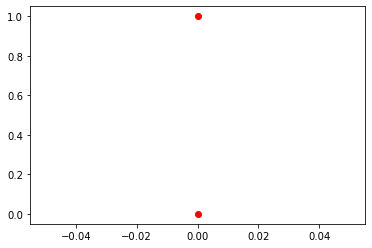

In [13]:
data_OR = np.array(
    [
        [0,0,0],
        [0,1,1],
        [1,0,1],
        [1,1,1]
    ]
    ,dtype=np.int32)
X = data_OR[:,:2]
Y = data_OR[:,-1]
plt.scatter(X[0], X[1], color = 'red')

Creamos los Weights para el perceptron, incluyendo el $W_0$ para el bias

In [32]:
W = np.random.rand(X.shape[1] + 1)
lr = 0.01
activation_fn = activation_threshold2

In [39]:
train(X, Y, W, lr=lr, activation_fn=activation_fn)

Valor esperado=0, obtenido=1
W0=0.09245688624127718 -> 0.08245688624127719, Y=0, Y'=1, x=1.0
W1=0.7524484408442955 -> 0.7524484408442955, Y=0, Y'=1, x=0.0
W2=0.6087730458058627 -> 0.6087730458058627, Y=0, Y'=1, x=0.0
Valor esperado=1, obtenido=1
W0=0.08245688624127719 -> 0.08245688624127719, Y=1, Y'=1, x=1.0
W1=0.7524484408442955 -> 0.7524484408442955, Y=1, Y'=1, x=0.0
W2=0.6087730458058627 -> 0.6087730458058627, Y=1, Y'=1, x=1.0
Valor esperado=1, obtenido=1
W0=0.08245688624127719 -> 0.08245688624127719, Y=1, Y'=1, x=1.0
W1=0.7524484408442955 -> 0.7524484408442955, Y=1, Y'=1, x=1.0
W2=0.6087730458058627 -> 0.6087730458058627, Y=1, Y'=1, x=0.0
Valor esperado=1, obtenido=1
W0=0.08245688624127719 -> 0.08245688624127719, Y=1, Y'=1, x=1.0
W1=0.7524484408442955 -> 0.7524484408442955, Y=1, Y'=1, x=1.0
W2=0.6087730458058627 -> 0.6087730458058627, Y=1, Y'=1, x=1.0
Iteration: 1, loss=2.0
Valor esperado=0, obtenido=1
W0=0.08245688624127719 -> 0.07245688624127719, Y=0, Y'=1, x=1.0
W1=0.75244844084